In [42]:
import os
import pandas as pd

os.chdir('/Users/zhangjifeng/Documents/python/Jupyter/利用 Python 进行数据分析/ch02')
os.getcwd()

'/Users/zhangjifeng/Documents/python/Jupyter/利用 Python 进行数据分析/ch02'

In [43]:
path = 'babynames/yob1880.txt'

columns = ['name', 'sex', 'births']

names = pd.read_csv(path, names=columns, engine='python')
names.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [44]:
years = range(1880, 2011)

tempArray = []

for year in years:
    path = 'babynames/yob%s.txt' %year
    frame = pd.read_csv(path, names=columns, engine='python')
    frame['year'] = year
    tempArray.append(frame)

names = pd.concat(tempArray, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [45]:
total_births = names.pivot_table('births', index = 'year', columns='sex', aggfunc=sum)
total_births.head(10)

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


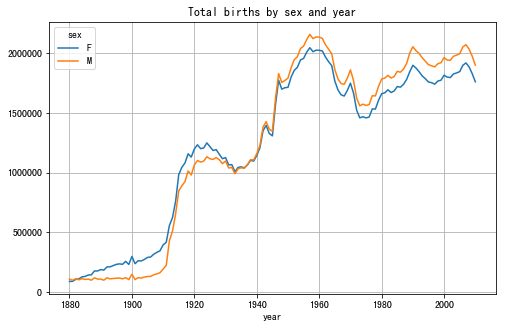

In [46]:
#绘制图表

total_births.plot(figsize=(8,5), grid=True, title='Total births by sex and year')

In [47]:
def add_prop(group):
    births = group.births.astype(float)
    #添加婴儿数相对于总出生数的比例
    group['prop'] = group.births / births.sum()
    return group



names_prop = names.groupby(['year', 'sex']).apply(add_prop)
names_prop.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [48]:
import numpy as np

#验证有效性，是否男女比例相加之后和为1
np.allclose(names_prop.groupby(['year','sex']).prop.sum(), 1)

True

In [49]:
#按年份和性别分组，按births 排序，取前1000条
top1000 = names_prop.groupby(['year','sex']).apply(lambda x : x.sort_values(by='births', ascending=False)[:1000])

top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

/Users/zhangjifeng/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12913c080>,
      dtype=object)

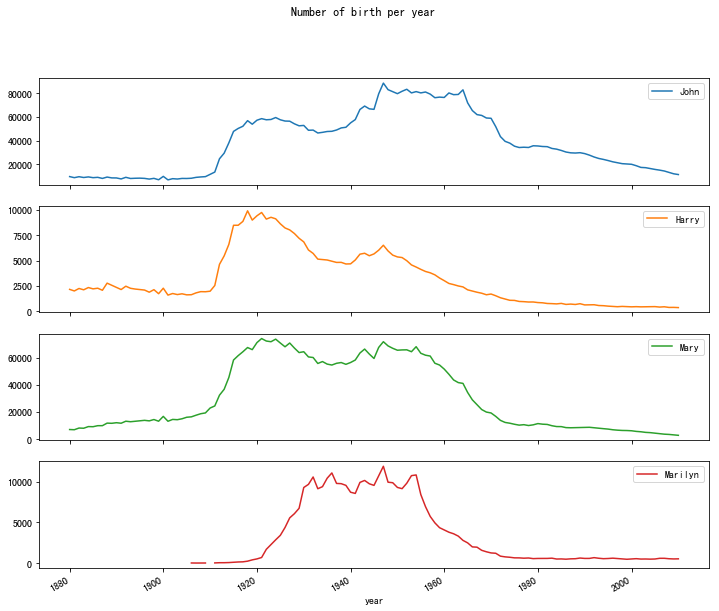

In [50]:
#按男、女 分组

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

subset = total_births[['John','Harry','Mary','Marilyn']]

# subset.head()

subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of birth per year')
#可见，给小孩起一个常见的名字的比例越来越小

In [52]:
#计算最流行的1000个名字所占的比例

table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.head()

/Users/zhangjifeng/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/zhangjifeng/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:81: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


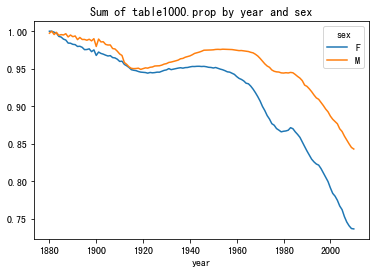

In [54]:
table.plot(title='Sum of table1000.prop by year and sex')

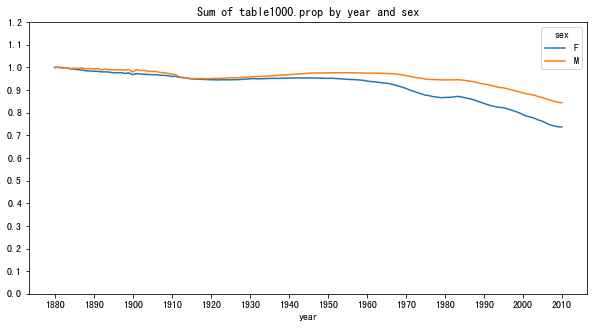

In [59]:
table.plot(title='Sum of table1000.prop by year and sex', figsize=(10,5),
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [64]:
#计算前面多少个名字的人数加起来够50%

#先以2010年的 boys 为例子

df = boys[boys['year']==2010]

prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()
prop_cumsum.head(10)
prop_cumsum.searchsorted(0.5)

array([116])